# Part 1

Here we will try and make a CNN arcitecture work that was made in the Chollet text, section 5.2, work with different images other than cats and dogs.

In [ ]:
from keras import layers, models, optimizers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.optimizers import SGD

The changes that I made to the code was first change the stride size in each convolutional layer. From the text, originally it was 3 x 3, but the cifar data has a different input shape than the cats and dogs images that the text was using. If we were to leave it at the same size, our input shape for the last convultional layer would be too small and turn negative.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

A quick summary of our working model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         6

For our dataset, we would have to scale the data in the range between 0 and 255, since that is the scale of RGB colors.

In [ ]:
# load cifar dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

170500096/170498071 [==============================] - 2s 0us/step


Lets see what the first image is from the dataset.

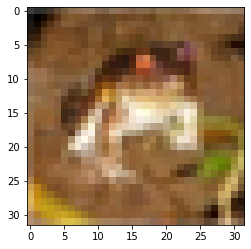

In [ ]:
plt.imshow(X_train[0])
plt.show()

Using the same loss and optimizers as the text used, we can see that after the first epoch of thid model, the accuracy of it was really bad, at 0.35, buta afte 20 epochs it seem to look like it is bottoming out.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
782/782 [==============================] - 4s 5ms/step - loss: 1.7413 - acc: 0.3564 - val_loss: 1.6299 - val_acc: 0.4099
Epoch 2/30
782/782 [==============================] - 4s 5ms/step - loss: 1.3240 - acc: 0.5221 - val_loss: 1.3288 - val_acc: 0.5115
Epoch 3/30
782/782 [==============================] - 4s 5ms/step - loss: 1.0993 - acc: 0.6083 - val_loss: 1.0925 - val_acc: 0.6107
Epoch 4/30
782/782 [==============================] - 4s 5ms/step - loss: 0.9467 - acc: 0.6662 - val_loss: 1.2064 - val_acc: 0.6060
Epoch 5/30
782/782 [==============================] - 4s 5ms/step - loss: 0.8377 - acc: 0.7056 - val_loss: 1.1204 - val_acc: 0.6156
Epoch 6/30
782/782 [==============================] - 4s 5ms/step - loss: 0.7555 - acc: 0.7341 - val_loss: 1.0359 - val_acc: 0.6482
Epoch 7/30
782/782 [==============================] - 4s 5ms/step - loss: 0.6828 - acc: 0.7613 - val_loss: 0.9601 - val_acc: 0.6758
Epoch 8/30
782/782 [==============================] - 4s 5ms/step - loss: 0.

In [ ]:
def plot_model_acc_loss(history):
    """ Plot training, test acc & loss. """,
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.figure()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])

    plt.show();

Looking at the model training / validation accuracy, and loss, the graphs look similar to the ones from the Chollet figures (5.9, 5.10). However, looking at the training / validation loss, it is scaled higher than the text figures.

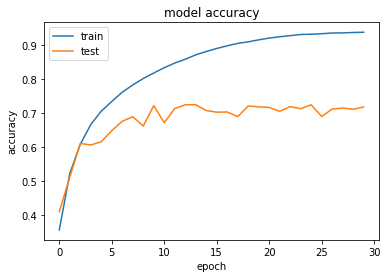

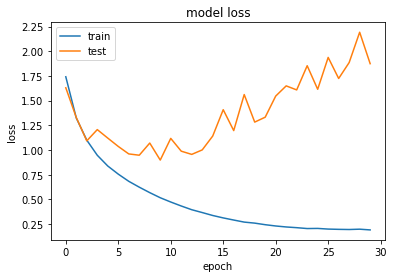

In [ ]:
plot_model_acc_loss(history)

# Part 2

I will be experimenting with the model and changing a few paramters to see if there are any performance differences. Instead of switching from a convolutional filter to a max pooling filter, I will put two convolutional filters next to each other to see if there is a difference. Another addition to this model will be having a dropout layer.

In [ ]:
# different model
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 31, 31, 32)        416       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 30, 30, 64)        8256      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)             

I will change the optimizer to be Adam as well to see if there is a difference

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Using a different CNN architecture, and changing the optimizer to Adam, we can see a difference in accuracy and a difference in validation loss. Changing the batch size to a smaller one seemed to improve it as well, and it seems to be bottoming out and a lower epoch.

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

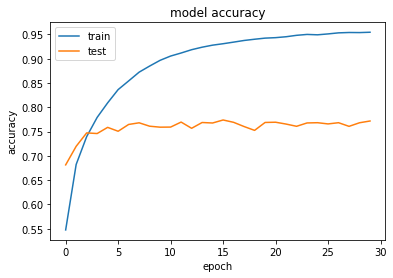

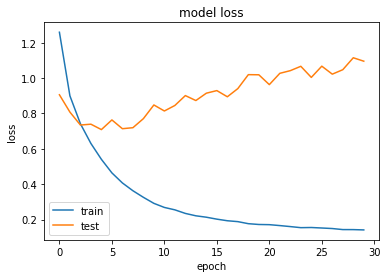

In [ ]:
plot_model_acc_loss(history)

This is the last model, with a stride size of 3 x 3, and no dropout.

In [ ]:
# smaller model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)            

In this model, it will use SGD optimizer with momentum and nesterov

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=True), metrics=['acc'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/30
3125/3125 [==============================] - 11s 4ms/step - loss: 1.8665 - acc: 0.3191 - val_loss: 1.5730 - val_acc: 0.4171
Epoch 2/30
3125/3125 [==============================] - 11s 3ms/step - loss: 1.4485 - acc: 0.4799 - val_loss: 1.3614 - val_acc: 0.5047
Epoch 3/30
3125/3125 [==============================] - 10s 3ms/step - loss: 1.2754 - acc: 0.5480 - val_loss: 1.2233 - val_acc: 0.5639
Epoch 4/30
3125/3125 [==============================] - 11s 3ms/step - loss: 1.1363 - acc: 0.5993 - val_loss: 1.1163 - val_acc: 0.6048
Epoch 5/30
3125/3125 [==============================] - 11s 4ms/step - loss: 1.0234 - acc: 0.6429 - val_loss: 1.0861 - val_acc: 0.6249
Epoch 6/30
3125/3125 [==============================] - 10s 3ms/step - loss: 0.9293 - acc: 0.6758 - val_loss: 0.9865 - val_acc: 0.6588
Epoch 7/30
3125/3125 [==============================] - 10s 3ms/step - loss: 0.8476 - acc: 0.7042 - val_loss: 0.9494 - val_acc: 0.6697
Epoch 8/30
3125/3125 [==============================] -

We can see some overfitting with all of our models, sinze the validation accuracy tend to stay the same, and the test loss didnt seem to improve after 5 epochs.

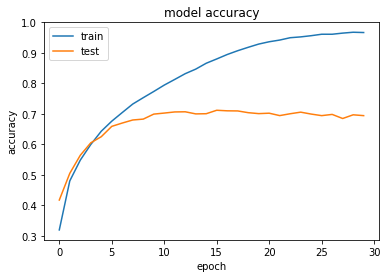

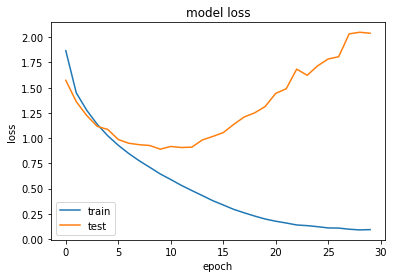

In [ ]:
plot_model_acc_loss(history)